# Schema on Read

In [1]:
from pyspark.sql import SparkSession
import pandas as pd
import matplotlib

In [2]:
spark = SparkSession.builder.getOrCreate()

In [3]:
dfLog = spark.read.text("data/NASA_access_log_Jul95.gz")

# Load the dataset

In [4]:
#Data Source: http://ita.ee.lbl.gov/traces/NASA_access_log_Jul95.gz
dfLog = spark.read.text("data/NASA_access_log_Jul95.gz")

# Quick inspection of  the data set

In [5]:
# see the schema
dfLog.printSchema()

root
 |-- value: string (nullable = true)



In [6]:
# number of lines
dfLog.count()

1891715

In [7]:
#what's in there? 
dfLog.show(5)

+--------------------+
|               value|
+--------------------+
|199.72.81.55 - - ...|
|unicomp6.unicomp....|
|199.120.110.21 - ...|
|burger.letters.co...|
|199.120.110.21 - ...|
+--------------------+
only showing top 5 rows



In [8]:
#a better show?
dfLog.show(5, truncate=False)

+-----------------------------------------------------------------------------------------------------------------------+
|value                                                                                                                  |
+-----------------------------------------------------------------------------------------------------------------------+
|199.72.81.55 - - [01/Jul/1995:00:00:01 -0400] "GET /history/apollo/ HTTP/1.0" 200 6245                                 |
|unicomp6.unicomp.net - - [01/Jul/1995:00:00:06 -0400] "GET /shuttle/countdown/ HTTP/1.0" 200 3985                      |
|199.120.110.21 - - [01/Jul/1995:00:00:09 -0400] "GET /shuttle/missions/sts-73/mission-sts-73.html HTTP/1.0" 200 4085   |
|burger.letters.com - - [01/Jul/1995:00:00:11 -0400] "GET /shuttle/countdown/liftoff.html HTTP/1.0" 304 0               |
|199.120.110.21 - - [01/Jul/1995:00:00:11 -0400] "GET /shuttle/missions/sts-73/sts-73-patch-small.gif HTTP/1.0" 200 4179|
+-----------------------

In [9]:
#pandas to the rescue
pd.set_option('max_colwidth', 200)
dfLog.limit(5).toPandas()

,value
0,"199.72.81.55 - - [01/Jul/1995:00:00:01 -0400] ""GET /history/apollo/ HTTP/1.0"" 200 6245"
1,"unicomp6.unicomp.net - - [01/Jul/1995:00:00:06 -0400] ""GET /shuttle/countdown/ HTTP/1.0"" 200 3985"
2,"199.120.110.21 - - [01/Jul/1995:00:00:09 -0400] ""GET /shuttle/missions/sts-73/mission-sts-73.html HTTP/1.0"" 200 4085"
3,"burger.letters.com - - [01/Jul/1995:00:00:11 -0400] ""GET /shuttle/countdown/liftoff.html HTTP/1.0"" 304 0"
4,"199.120.110.21 - - [01/Jul/1995:00:00:11 -0400] ""GET /shuttle/missions/sts-73/sts-73-patch-small.gif HTTP/1.0"" 200 4179"


# Let' try simple parsing with split

In [10]:
## import split function
from pyspark.sql.functions import split

In [11]:
## apply withColumn() function:
dfArrays = dfLog.withColumn("tokenized", split("value"," "))
dfArrays.limit(10).toPandas()

,value,tokenized
0,"199.72.81.55 - - [01/Jul/1995:00:00:01 -0400] ""GET /history/apollo/ HTTP/1.0"" 200 6245","[199.72.81.55, -, -, [01/Jul/1995:00:00:01, -0400], ""GET, /history/apollo/, HTTP/1.0"", 200, 6245]"
1,"unicomp6.unicomp.net - - [01/Jul/1995:00:00:06 -0400] ""GET /shuttle/countdown/ HTTP/1.0"" 200 3985","[unicomp6.unicomp.net, -, -, [01/Jul/1995:00:00:06, -0400], ""GET, /shuttle/countdown/, HTTP/1.0"", 200, 3985]"
2,"199.120.110.21 - - [01/Jul/1995:00:00:09 -0400] ""GET /shuttle/missions/sts-73/mission-sts-73.html HTTP/1.0"" 200 4085","[199.120.110.21, -, -, [01/Jul/1995:00:00:09, -0400], ""GET, /shuttle/missions/sts-73/mission-sts-73.html, HTTP/1.0"", 200, 4085]"
3,"burger.letters.com - - [01/Jul/1995:00:00:11 -0400] ""GET /shuttle/countdown/liftoff.html HTTP/1.0"" 304 0","[burger.letters.com, -, -, [01/Jul/1995:00:00:11, -0400], ""GET, /shuttle/countdown/liftoff.html, HTTP/1.0"", 304, 0]"
4,"199.120.110.21 - - [01/Jul/1995:00:00:11 -0400] ""GET /shuttle/missions/sts-73/sts-73-patch-small.gif HTTP/1.0"" 200 4179","[199.120.110.21, -, -, [01/Jul/1995:00:00:11, -0400], ""GET, /shuttle/missions/sts-73/sts-73-patch-small.gif, HTTP/1.0"", 200, 4179]"
5,"burger.letters.com - - [01/Jul/1995:00:00:12 -0400] ""GET /images/NASA-logosmall.gif HTTP/1.0"" 304 0","[burger.letters.com, -, -, [01/Jul/1995:00:00:12, -0400], ""GET, /images/NASA-logosmall.gif, HTTP/1.0"", 304, 0]"
6,"burger.letters.com - - [01/Jul/1995:00:00:12 -0400] ""GET /shuttle/countdown/video/livevideo.gif HTTP/1.0"" 200 0","[burger.letters.com, -, -, [01/Jul/1995:00:00:12, -0400], ""GET, /shuttle/countdown/video/livevideo.gif, HTTP/1.0"", 200, 0]"
7,"205.212.115.106 - - [01/Jul/1995:00:00:12 -0400] ""GET /shuttle/countdown/countdown.html HTTP/1.0"" 200 3985","[205.212.115.106, -, -, [01/Jul/1995:00:00:12, -0400], ""GET, /shuttle/countdown/countdown.html, HTTP/1.0"", 200, 3985]"
8,"d104.aa.net - - [01/Jul/1995:00:00:13 -0400] ""GET /shuttle/countdown/ HTTP/1.0"" 200 3985","[d104.aa.net, -, -, [01/Jul/1995:00:00:13, -0400], ""GET, /shuttle/countdown/, HTTP/1.0"", 200, 3985]"
9,"129.94.144.152 - - [01/Jul/1995:00:00:13 -0400] ""GET / HTTP/1.0"" 200 7074","[129.94.144.152, -, -, [01/Jul/1995:00:00:13, -0400], ""GET, /, HTTP/1.0"", 200, 7074]"


# Second attempt, let's build a custom parsing UDF 

##### More about UDF functions at https://docs.databricks.com/spark/latest/spark-sql/udf-python.html

<img src='https://github.com/anurag-code/Data-Engineering/blob/master/Spark/Data%20Lakes/UdfBasics1.png'>
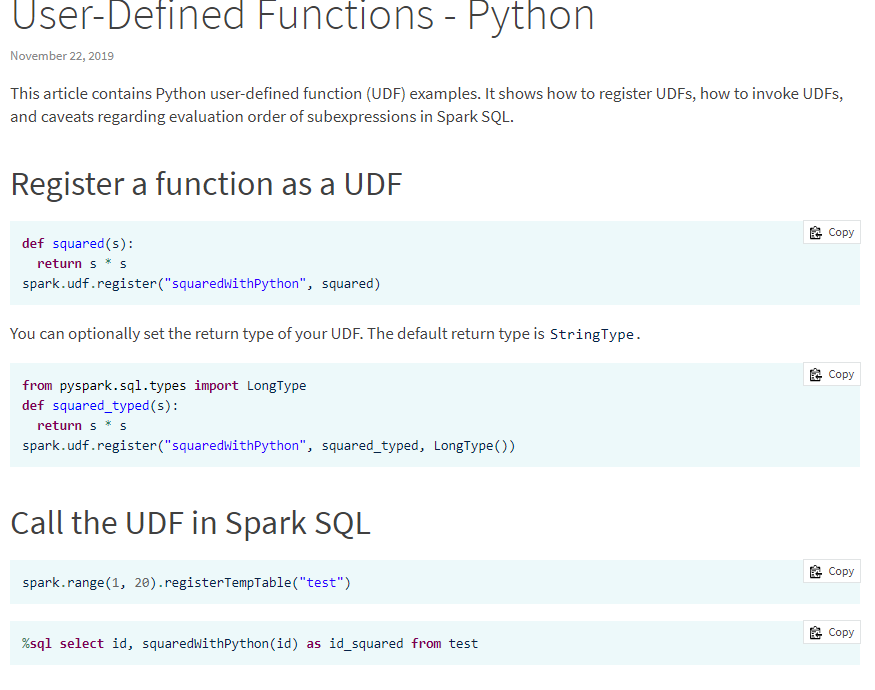

![image.png](https://github.com/anurag-code/Data-Engineering/blob/master/Spark/Data%20Lakes/UdfBasics1.PNG)


#### As we can see above that UDF has been defined as a decorator using prefix '@'.
#### @udf("long")   --> Means the function defined below this @udf("long") is a udf function, which has the return type as "long". The function name is already defined in the function definition. Thus we have all the three things required for calling udf api from pyspark.
#### 1. UDF function registery (done by @udf)
#### 2. function name (def squared_df )
#### 3. return data type (long type), by default it is string type.
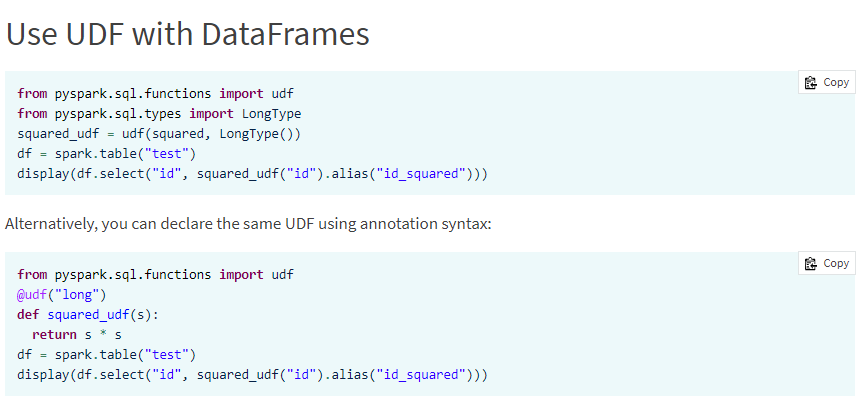

#### For more on UDFs visit https://docs.databricks.com/spark/latest/spark-sql/udf-python.html

In [12]:
from pyspark.sql.functions import udf

@udf
def parseUDF(line):
    import re
    PATTERN = '^(\S+) (\S+) (\S+) \[([\w:/]+\s[+\-]\d{4})\] "(\S+) (\S+)\s*(\S*)" (\d{3}) (\S+)'
    match = re.search(PATTERN, line)
    if match is None:
        return (line, 0)
    size_field = match.group(9)
    if size_field == '-':
        size = 0
    else:
        size = match.group(9)
    return {
        "host"          : match.group(1), 
        "client_identd" : match.group(2), 
        "user_id"       : match.group(3), 
        "date_time"     : match.group(4), 
        "method"        : match.group(5),
        "endpoint"      : match.group(6),
        "protocol"      : match.group(7),
        "response_code" : int(match.group(8)),
        "content_size"  : size
    }

In [13]:
#Let's check the data returned by udf
dfParsed= dfLog.withColumn("parsed", parseUDF("value"))
dfParsed.limit(10).toPandas()

,value,parsed
0,"199.72.81.55 - - [01/Jul/1995:00:00:01 -0400] ""GET /history/apollo/ HTTP/1.0"" 200 6245","{response_code=200, protocol=HTTP/1.0, endpoint=/history/apollo/, content_size=6245, method=GET, date_time=01/Jul/1995:00:00:01 -0400, user_id=-, host=199.72.81.55, client_identd=-}"
1,"unicomp6.unicomp.net - - [01/Jul/1995:00:00:06 -0400] ""GET /shuttle/countdown/ HTTP/1.0"" 200 3985","{response_code=200, protocol=HTTP/1.0, endpoint=/shuttle/countdown/, content_size=3985, method=GET, date_time=01/Jul/1995:00:00:06 -0400, user_id=-, host=unicomp6.unicomp.net, client_identd=-}"
2,"199.120.110.21 - - [01/Jul/1995:00:00:09 -0400] ""GET /shuttle/missions/sts-73/mission-sts-73.html HTTP/1.0"" 200 4085","{response_code=200, protocol=HTTP/1.0, endpoint=/shuttle/missions/sts-73/mission-sts-73.html, content_size=4085, method=GET, date_time=01/Jul/1995:00:00:09 -0400, user_id=-, host=199.120.110.21, c..."
3,"burger.letters.com - - [01/Jul/1995:00:00:11 -0400] ""GET /shuttle/countdown/liftoff.html HTTP/1.0"" 304 0","{response_code=304, protocol=HTTP/1.0, endpoint=/shuttle/countdown/liftoff.html, content_size=0, method=GET, date_time=01/Jul/1995:00:00:11 -0400, user_id=-, host=burger.letters.com, client_identd=-}"
4,"199.120.110.21 - - [01/Jul/1995:00:00:11 -0400] ""GET /shuttle/missions/sts-73/sts-73-patch-small.gif HTTP/1.0"" 200 4179","{response_code=200, protocol=HTTP/1.0, endpoint=/shuttle/missions/sts-73/sts-73-patch-small.gif, content_size=4179, method=GET, date_time=01/Jul/1995:00:00:11 -0400, user_id=-, host=199.120.110.21..."
5,"burger.letters.com - - [01/Jul/1995:00:00:12 -0400] ""GET /images/NASA-logosmall.gif HTTP/1.0"" 304 0","{response_code=304, protocol=HTTP/1.0, endpoint=/images/NASA-logosmall.gif, content_size=0, method=GET, date_time=01/Jul/1995:00:00:12 -0400, user_id=-, host=burger.letters.com, client_identd=-}"
6,"burger.letters.com - - [01/Jul/1995:00:00:12 -0400] ""GET /shuttle/countdown/video/livevideo.gif HTTP/1.0"" 200 0","{response_code=200, protocol=HTTP/1.0, endpoint=/shuttle/countdown/video/livevideo.gif, content_size=0, method=GET, date_time=01/Jul/1995:00:00:12 -0400, user_id=-, host=burger.letters.com, client..."
7,"205.212.115.106 - - [01/Jul/1995:00:00:12 -0400] ""GET /shuttle/countdown/countdown.html HTTP/1.0"" 200 3985","{response_code=200, protocol=HTTP/1.0, endpoint=/shuttle/countdown/countdown.html, content_size=3985, method=GET, date_time=01/Jul/1995:00:00:12 -0400, user_id=-, host=205.212.115.106, client_iden..."
8,"d104.aa.net - - [01/Jul/1995:00:00:13 -0400] ""GET /shuttle/countdown/ HTTP/1.0"" 200 3985","{response_code=200, protocol=HTTP/1.0, endpoint=/shuttle/countdown/, content_size=3985, method=GET, date_time=01/Jul/1995:00:00:13 -0400, user_id=-, host=d104.aa.net, client_identd=-}"
9,"129.94.144.152 - - [01/Jul/1995:00:00:13 -0400] ""GET / HTTP/1.0"" 200 7074","{response_code=200, protocol=HTTP/1.0, endpoint=/, content_size=7074, method=GET, date_time=01/Jul/1995:00:00:13 -0400, user_id=-, host=129.94.144.152, client_identd=-}"


In [14]:
dfParsed.printSchema()

## Here we see that the data returned by udf is not of dictionary type (in python) or map type (in pyspark). 
## Thus, there is no key and value within Parsed column in the schema shown below. 

root
 |-- value: string (nullable = true)
 |-- parsed: string (nullable = true)



# Third attempt, let's fix our UDF

In [15]:
#from pyspark.sql.functions import udf # already imported
# Lets import Map type and StringType
from pyspark.sql.types import MapType, StringType

@udf(MapType(StringType(),StringType()))
def parseUDFbetter(line):
    import re
    PATTERN = '^(\S+) (\S+) (\S+) \[([\w:/]+\s[+\-]\d{4})\] "(\S+) (\S+)\s*(\S*)" (\d{3}) (\S+)'
    match = re.search(PATTERN, line)
    if match is None:
        return (line, 0)
    size_field = match.group(9)
    if size_field == '-':
        size = 0
    else:
        size = match.group(9)
    return {
        "host"          : match.group(1), 
        "client_identd" : match.group(2), 
        "user_id"       : match.group(3), 
        "date_time"     : match.group(4), 
        "method"        : match.group(5),
        "endpoint"      : match.group(6),
        "protocol"      : match.group(7),
        "response_code" : int(match.group(8)),
        "content_size"  : size
    }

In [16]:
#Let's start from the beginning
dfParsed= dfLog.withColumn("parsed", parseUDFbetter("value"))
dfParsed.limit(10).toPandas()

## output shows the Map type format now.

,value,parsed
0,"199.72.81.55 - - [01/Jul/1995:00:00:01 -0400] ""GET /history/apollo/ HTTP/1.0"" 200 6245","{'response_code': '200', 'protocol': 'HTTP/1.0', 'endpoint': '/history/apollo/', 'content_size': '6245', 'method': 'GET', 'date_time': '01/Jul/1995:00:00:01 -0400', 'user_id': '-', 'host': '199.72..."
1,"unicomp6.unicomp.net - - [01/Jul/1995:00:00:06 -0400] ""GET /shuttle/countdown/ HTTP/1.0"" 200 3985","{'response_code': '200', 'protocol': 'HTTP/1.0', 'endpoint': '/shuttle/countdown/', 'content_size': '3985', 'method': 'GET', 'date_time': '01/Jul/1995:00:00:06 -0400', 'user_id': '-', 'host': 'uni..."
2,"199.120.110.21 - - [01/Jul/1995:00:00:09 -0400] ""GET /shuttle/missions/sts-73/mission-sts-73.html HTTP/1.0"" 200 4085","{'response_code': '200', 'protocol': 'HTTP/1.0', 'endpoint': '/shuttle/missions/sts-73/mission-sts-73.html', 'content_size': '4085', 'method': 'GET', 'date_time': '01/Jul/1995:00:00:09 -0400', 'us..."
3,"burger.letters.com - - [01/Jul/1995:00:00:11 -0400] ""GET /shuttle/countdown/liftoff.html HTTP/1.0"" 304 0","{'response_code': '304', 'protocol': 'HTTP/1.0', 'endpoint': '/shuttle/countdown/liftoff.html', 'content_size': '0', 'method': 'GET', 'date_time': '01/Jul/1995:00:00:11 -0400', 'user_id': '-', 'ho..."
4,"199.120.110.21 - - [01/Jul/1995:00:00:11 -0400] ""GET /shuttle/missions/sts-73/sts-73-patch-small.gif HTTP/1.0"" 200 4179","{'response_code': '200', 'protocol': 'HTTP/1.0', 'endpoint': '/shuttle/missions/sts-73/sts-73-patch-small.gif', 'content_size': '4179', 'method': 'GET', 'date_time': '01/Jul/1995:00:00:11 -0400', ..."
5,"burger.letters.com - - [01/Jul/1995:00:00:12 -0400] ""GET /images/NASA-logosmall.gif HTTP/1.0"" 304 0","{'response_code': '304', 'protocol': 'HTTP/1.0', 'endpoint': '/images/NASA-logosmall.gif', 'content_size': '0', 'method': 'GET', 'date_time': '01/Jul/1995:00:00:12 -0400', 'user_id': '-', 'host': ..."
6,"burger.letters.com - - [01/Jul/1995:00:00:12 -0400] ""GET /shuttle/countdown/video/livevideo.gif HTTP/1.0"" 200 0","{'response_code': '200', 'protocol': 'HTTP/1.0', 'endpoint': '/shuttle/countdown/video/livevideo.gif', 'content_size': '0', 'method': 'GET', 'date_time': '01/Jul/1995:00:00:12 -0400', 'user_id': '..."
7,"205.212.115.106 - - [01/Jul/1995:00:00:12 -0400] ""GET /shuttle/countdown/countdown.html HTTP/1.0"" 200 3985","{'response_code': '200', 'protocol': 'HTTP/1.0', 'endpoint': '/shuttle/countdown/countdown.html', 'content_size': '3985', 'method': 'GET', 'date_time': '01/Jul/1995:00:00:12 -0400', 'user_id': '-'..."
8,"d104.aa.net - - [01/Jul/1995:00:00:13 -0400] ""GET /shuttle/countdown/ HTTP/1.0"" 200 3985","{'response_code': '200', 'protocol': 'HTTP/1.0', 'endpoint': '/shuttle/countdown/', 'content_size': '3985', 'method': 'GET', 'date_time': '01/Jul/1995:00:00:13 -0400', 'user_id': '-', 'host': 'd10..."
9,"129.94.144.152 - - [01/Jul/1995:00:00:13 -0400] ""GET / HTTP/1.0"" 200 7074","{'response_code': '200', 'protocol': 'HTTP/1.0', 'endpoint': '/', 'content_size': '7074', 'method': 'GET', 'date_time': '01/Jul/1995:00:00:13 -0400', 'user_id': '-', 'host': '129.94.144.152', 'cli..."


In [17]:
#Bingo!! we'got a column of type map with the fields parsed
dfParsed.printSchema()

## Npw we get key value under parsed. The key can never be Null thus by default (valueContainsNull = false)

root
 |-- value: string (nullable = true)
 |-- parsed: map (nullable = true)
 |    |-- key: string
 |    |-- value: string (valueContainsNull = true)



In [18]:
#Lets see in pandas format
dfParsed.select("parsed").limit(10).toPandas()

,parsed
0,"{'response_code': '200', 'protocol': 'HTTP/1.0', 'endpoint': '/history/apollo/', 'content_size': '6245', 'method': 'GET', 'date_time': '01/Jul/1995:00:00:01 -0400', 'user_id': '-', 'host': '199.72..."
1,"{'response_code': '200', 'protocol': 'HTTP/1.0', 'endpoint': '/shuttle/countdown/', 'content_size': '3985', 'method': 'GET', 'date_time': '01/Jul/1995:00:00:06 -0400', 'user_id': '-', 'host': 'uni..."
2,"{'response_code': '200', 'protocol': 'HTTP/1.0', 'endpoint': '/shuttle/missions/sts-73/mission-sts-73.html', 'content_size': '4085', 'method': 'GET', 'date_time': '01/Jul/1995:00:00:09 -0400', 'us..."
3,"{'response_code': '304', 'protocol': 'HTTP/1.0', 'endpoint': '/shuttle/countdown/liftoff.html', 'content_size': '0', 'method': 'GET', 'date_time': '01/Jul/1995:00:00:11 -0400', 'user_id': '-', 'ho..."
4,"{'response_code': '200', 'protocol': 'HTTP/1.0', 'endpoint': '/shuttle/missions/sts-73/sts-73-patch-small.gif', 'content_size': '4179', 'method': 'GET', 'date_time': '01/Jul/1995:00:00:11 -0400', ..."
5,"{'response_code': '304', 'protocol': 'HTTP/1.0', 'endpoint': '/images/NASA-logosmall.gif', 'content_size': '0', 'method': 'GET', 'date_time': '01/Jul/1995:00:00:12 -0400', 'user_id': '-', 'host': ..."
6,"{'response_code': '200', 'protocol': 'HTTP/1.0', 'endpoint': '/shuttle/countdown/video/livevideo.gif', 'content_size': '0', 'method': 'GET', 'date_time': '01/Jul/1995:00:00:12 -0400', 'user_id': '..."
7,"{'response_code': '200', 'protocol': 'HTTP/1.0', 'endpoint': '/shuttle/countdown/countdown.html', 'content_size': '3985', 'method': 'GET', 'date_time': '01/Jul/1995:00:00:12 -0400', 'user_id': '-'..."
8,"{'response_code': '200', 'protocol': 'HTTP/1.0', 'endpoint': '/shuttle/countdown/', 'content_size': '3985', 'method': 'GET', 'date_time': '01/Jul/1995:00:00:13 -0400', 'user_id': '-', 'host': 'd10..."
9,"{'response_code': '200', 'protocol': 'HTTP/1.0', 'endpoint': '/', 'content_size': '7074', 'method': 'GET', 'date_time': '01/Jul/1995:00:00:13 -0400', 'user_id': '-', 'host': '129.94.144.152', 'cli..."


# Let's build separate columns

In [19]:
## The difference between the select and selectexpr is that in select expression we can write as text as in sql or hive.
## Selectexpr is created for SQl and Hive users.
dfParsed.selectExpr("parsed['host'] as host").limit(5).show(5)

+--------------------+
|                host|
+--------------------+
|        199.72.81.55|
|unicomp6.unicomp.net|
|      199.120.110.21|
|  burger.letters.com|
|      199.120.110.21|
+--------------------+



In [20]:
dfParsed.selectExpr(["parsed['host']", "parsed['date_time']"]).show(5)

+--------------------+--------------------+
|        parsed[host]|   parsed[date_time]|
+--------------------+--------------------+
|        199.72.81.55|01/Jul/1995:00:00...|
|unicomp6.unicomp.net|01/Jul/1995:00:00...|
|      199.120.110.21|01/Jul/1995:00:00...|
|  burger.letters.com|01/Jul/1995:00:00...|
|      199.120.110.21|01/Jul/1995:00:00...|
+--------------------+--------------------+
only showing top 5 rows



In [21]:
## List comprehension to get all the names of columns
fields = ["host", "client_identd","user_id", "date_time", "method", "endpoint", "protocol", "response_code", "content_size"]
exprs = [ "parsed['{}'] as {}".format(field,field) for field in fields]
exprs

["parsed['host'] as host",
 "parsed['client_identd'] as client_identd",
 "parsed['user_id'] as user_id",
 "parsed['date_time'] as date_time",
 "parsed['method'] as method",
 "parsed['endpoint'] as endpoint",
 "parsed['protocol'] as protocol",
 "parsed['response_code'] as response_code",
 "parsed['content_size'] as content_size"]

In [22]:
## *exprs is a shortcut and  is equivqlent to : ""parsed['host'] as host", "parsed['client_identd'] as client_identd", 
## "parsed['user_id'] as user_id", "parsed['date_time'] as date_time",
## "parsed['method'] as method", "parsed['endpoint'] as endpoint", "parsed['protocol'] as protocol", 
## "parsed['response_code'] as response_code", "parsed['content_size'] as content_size"

dfClean = dfParsed.selectExpr(*exprs)
dfClean.limit(5).toPandas()

,host,client_identd,user_id,date_time,method,endpoint,protocol,response_code,content_size
0,199.72.81.55,-,-,01/Jul/1995:00:00:01 -0400,GET,/history/apollo/,HTTP/1.0,200,6245
1,unicomp6.unicomp.net,-,-,01/Jul/1995:00:00:06 -0400,GET,/shuttle/countdown/,HTTP/1.0,200,3985
2,199.120.110.21,-,-,01/Jul/1995:00:00:09 -0400,GET,/shuttle/missions/sts-73/mission-sts-73.html,HTTP/1.0,200,4085
3,burger.letters.com,-,-,01/Jul/1995:00:00:11 -0400,GET,/shuttle/countdown/liftoff.html,HTTP/1.0,304,0
4,199.120.110.21,-,-,01/Jul/1995:00:00:11 -0400,GET,/shuttle/missions/sts-73/sts-73-patch-small.gif,HTTP/1.0,200,4179


## Popular hosts

In [23]:
from pyspark.sql.functions import desc
dfClean.groupBy("host").count().orderBy(desc("count")).limit(10).toPandas()

,host,count
0,piweba3y.prodigy.com,17572
1,piweba4y.prodigy.com,11591
2,piweba1y.prodigy.com,9868
3,alyssa.prodigy.com,7852
4,siltb10.orl.mmc.com,7573
5,piweba2y.prodigy.com,5922
6,edams.ksc.nasa.gov,5434
7,163.206.89.4,4906
8,news.ti.com,4863
9,disarray.demon.co.uk,4353


## Popular content

## Large Files

In [24]:
from pyspark.sql.functions import expr
dfCleanTyped = dfClean.withColumn("content_size_bytes", expr("cast(content_size  as int)"))
dfCleanTyped.limit(5).toPandas()

,host,client_identd,user_id,date_time,method,endpoint,protocol,response_code,content_size,content_size_bytes
0,199.72.81.55,-,-,01/Jul/1995:00:00:01 -0400,GET,/history/apollo/,HTTP/1.0,200,6245,6245
1,unicomp6.unicomp.net,-,-,01/Jul/1995:00:00:06 -0400,GET,/shuttle/countdown/,HTTP/1.0,200,3985,3985
2,199.120.110.21,-,-,01/Jul/1995:00:00:09 -0400,GET,/shuttle/missions/sts-73/mission-sts-73.html,HTTP/1.0,200,4085,4085
3,burger.letters.com,-,-,01/Jul/1995:00:00:11 -0400,GET,/shuttle/countdown/liftoff.html,HTTP/1.0,304,0,0
4,199.120.110.21,-,-,01/Jul/1995:00:00:11 -0400,GET,/shuttle/missions/sts-73/sts-73-patch-small.gif,HTTP/1.0,200,4179,4179


In [25]:
# Left for you, clean the date column :)
# 1- Create a udf that parses that weird format,
# 2- Create a new column with a data tiem string that spark would understand
# 3- Add a new date-time column properly typed
# 4- Print your schema

In [26]:
from pyspark.sql.functions import unix_timestamp, from_unixtime

In [27]:
dfCleanTyped.printSchema()

## Schema shows that that the date time is being read as string.

root
 |-- host: string (nullable = true)
 |-- client_identd: string (nullable = true)
 |-- user_id: string (nullable = true)
 |-- date_time: string (nullable = true)
 |-- method: string (nullable = true)
 |-- endpoint: string (nullable = true)
 |-- protocol: string (nullable = true)
 |-- response_code: string (nullable = true)
 |-- content_size: string (nullable = true)
 |-- content_size_bytes: integer (nullable = true)



In [78]:
dfCleanTyped.selectExpr('CAST(FROM_UNIXTIME(UNIX_TIMESTAMP(date_time, "dd/MMM/yyyy:HH:mm:ssZ")) AS timestamp) AS newdate')\
.limit(4).toPandas()

,newdate
0,1995-07-01 04:00:01
1,1995-07-01 04:00:06
2,1995-07-01 04:00:09
3,1995-07-01 04:00:11


In [79]:
newDataFrame = dfCleanTyped.selectExpr('CAST(FROM_UNIXTIME(UNIX_TIMESTAMP(date_time, "dd/MMM/yyyy:HH:mm:ssZ")) \
AS timestamp) AS newdate')

In [81]:
newDataFrame.printSchema()

root
 |-- newdate: timestamp (nullable = true)

